In [1]:
# https://colabdev.bioturing.com/notebook/identifying-tumor-cells-at-the-singlecell-level-us-cee1085d84

In [1]:
library(Seurat)
library(SingleR)
library(infercnv)
library(celldex)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
 

In [3]:
getwd()

[1] "/home/tanasa"

In [4]:
# downloaded the data in : /home/tanasa/infercnv_data

# url <- 'https://cdn.bioturing.com/colab/data/singleR_infercnv_data.zip'
# download.file(url, './singleR_infercnv_data.zip')                                             # download from url
# unzip(zipfile='singleR_infercnv_data.zip', exdir='./')

In [5]:
# Here, we propose ikarus, a machine learning pipeline aimed at distinguishing tumor cells from normal cells at the single-cell level. 
# We test ikarus on multiple single-cell datasets, showing that it achieves high sensitivity and specificity in multiple experimental contexts.
# InferCNV is a Bayesian method, which agglomerates the expression signal of genomically adjointed genes to ascertain whether there is a gain or loss of a certain larger genomic segmen

In [6]:
# In this notebook, we will use a sample dataset from Wu et al. This is a single-cell atlas for human breast cancers. 
# In this notebook, in order to simplify, we will use just a sample from this atlas. 
# The chosen sample is CID4495 (GEO accession ID: GSM5354530).

# Reference: Wu, S.Z., Al-Eryani, G., Roden, D.L. et al. A single-cell and spatially resolved atlas of human breast cancers. 
# Nat Genet 53, 1334–1347 (2021). https://doi.org/10.1038/s41588-021-00911-1

In [2]:
sparse_matrix <- Read10X(
    data.dir='infercnv_data/GSM5354530_CID4495',
    gene.column=1,
    cell.column=1
)

In [3]:
seu_obj <- CreateSeuratObject(sparse_matrix)

In [4]:
# str(seu_obj)

# Number of cells (columns of count matrix)
n_cells <- ncol(seu_obj)

# Number of genes/features (rows of count matrix)
n_genes <- nrow(seu_obj)

# Print the result
cat("📊 Number of cells:", n_cells, "\n")
cat("🧬 Number of genes:", n_genes, "\n")

gene_names <- rownames(seu_obj)
head(gene_names)     # Show the first few
tail(gene_names)     # Show the last few
length(gene_names)   # Total number of genes

📊 Number of cells: 7985 
🧬 Number of genes: 29733 


[1] "RP11-34P13.7"  "FO538757.3"    "FO538757.2"    "AP006222.2"   
[5] "RP4-669L17.10" "RP5-857K21.4"

[1] "RP11-231G15.2" "RP11-983C2.3"  "LINC00919"     "RP11-589P10.7"
[5] "KRTAP9-2"      "IGLVIV-66-1"

[1] 29733

In [5]:
# Log normalize
seu_obj <- NormalizeData(seu_obj)
# Find highly variable genes
seu_obj <- FindVariableFeatures(seu_obj)
# Center and scale the data matrix
seu_obj <- ScaleData(seu_obj)
# Compute PCA
seu_obj <- RunPCA(seu_obj)
# Compute shared-nearest neighbor graphs
seu_obj <- FindNeighbors(seu_obj)
# Run Louvain algoritm
seu_obj <- FindClusters(seu_obj)
# Run UMAP
seu_obj <- RunUMAP(seu_obj, dims = 1:30)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  SPARC, IGFBP7, SERPING1, NNMT, COL6A2, SPARCL1, PRSS23, COL6A1, IFITM3, GSN 
	   COL1A2, C1R, COL3A1, PLPP3, PTRF, IGFBP4, C1S, FSTL1, TIMP1, BGN 
	   COL4A2, CALD1, THY1, EFEMP2, COL5A2, SERPINF1, MMP2, CTSK, A2M, COL1A1 
Negative:  CD79A, MZB1, IGKV1-5, JCHAIN, DERL3, IGKV3-20, POU2AF1, IGKV3-11, IGLL5, IGLV3-1 
	   GZMK, IGLV3-25, IGKV1-9, IGHG1, IGKC, IGLV1-51, TNFRSF17, IGLV2-14, IGKV3-15, IGHG4 
	   IGLV1-40, IGKV4-1, AREG, RP11-290F5.1, IGHG3, IGLC2, IGHV3-30, PTTG1, HIST1H4C, IGLV6-57 
PC_ 2 
Positive:  TYROBP, FCER1G, AIF1, SERPINA1, MS4A6A, CD68, LILRB4, LYZ, SPI1, C1QA 
	   FCGR3A, C1QB, C1QC, PILRA, IGSF6, C15orf48, CD14, FPR3, FCGR1A, APOC1 
	   CYBB, CSF1R, MS4A7, LILRB2, IL4I1, FCGR2A, FGL2, LST1, CLEC7A, SLAMF8 
Negative:  MGP, CALD1, MGST1, KRT7, TM4SF1, CSRP2, KRT18, CDKN2A, CNN3, CD24 
	   EPCAM, CKB, FDCSP, GAL, MDK, CLDN3, KRT8, MEST, MARCKSL1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7985
Number of edges: 241191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8930
Number of communities: 17
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
08:42:20 UMAP embedding parameters a = 0.9922 b = 1.112

08:42:20 Read 7985 rows and found 30 numeric columns

08:42:20 Using Annoy for neighbor search, n_neighbors = 30

08:42:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:42:21 Writing NN index file to temp file /tmp/Rtmp3sO6H1/file4aaca6688c905

08:42:21 Searching Annoy index using 1 thread, search_k = 3000

08:42:22 Annoy recall = 100%

08:42:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [8]:
head(seu_obj@meta.data,2)

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters
,<fct>,<dbl>,<int>,<fct>,<fct>
CID4495_AACCGCGGTTTCCACC,CID4495,25856,5101,14,14
CID4495_ATCACGAAGGTGATAT,CID4495,1391,720,14,14


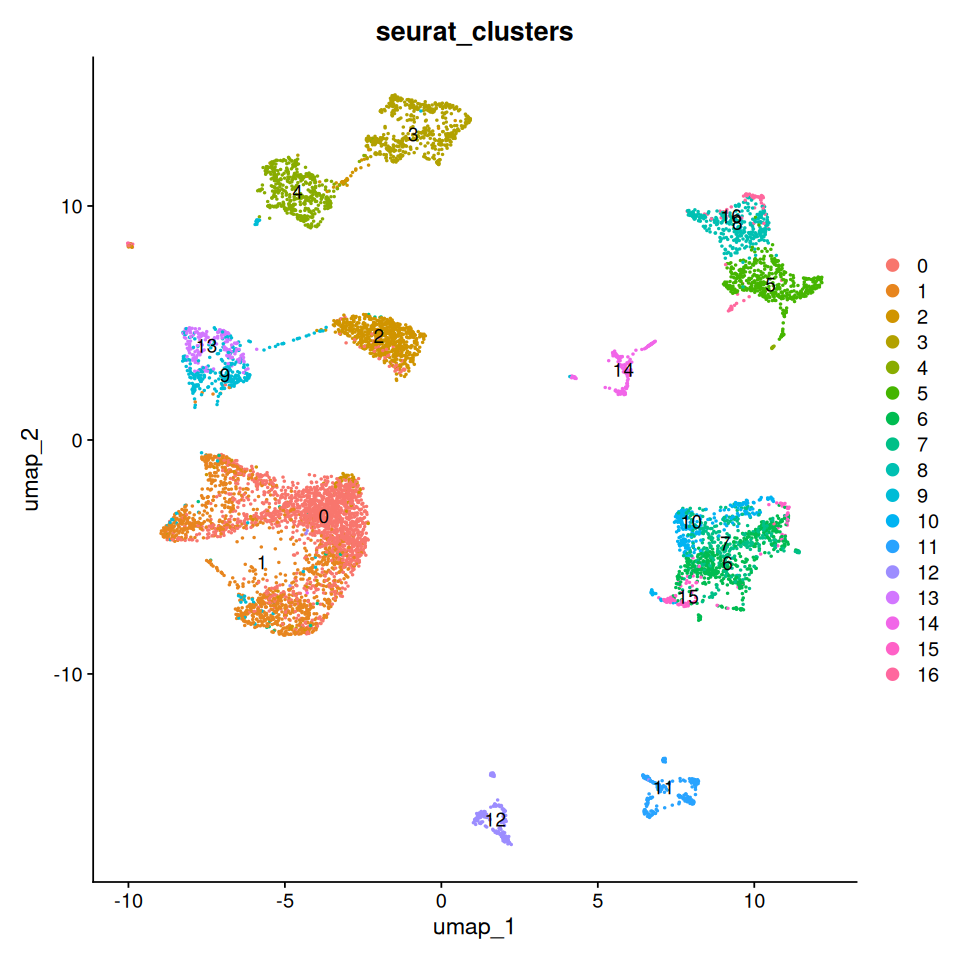

In [9]:
options(repr.plot.width=8, repr.plot.height=8)            
DimPlot(seu_obj, group.by='seurat_clusters', label=TRUE)

In [10]:
print("Cell type prediction with singleR")

[1] "Cell type prediction with singleR"


In [11]:
# 🧬 Reference Dataset Functions in SingleR

# Function	Species	Description

# BlueprintEncodeData()	Human	Combines Blueprint and ENCODE; immune cells and progenitors from various tissues. Good general-purpose immune+hematopoietic reference.
# DatabaseImmuneCellExpressionData()	Human	Aggregated immune reference built from multiple datasets (e.g., Monaco, Blueprint). Useful for robust immune cell annotation.
# HumanPrimaryCellAtlasData()	Human	Diverse primary human cells across tissues. Great for broad tissue-level annotation.
# ImmGenData()	Mouse	ImmGen consortium dataset; high-quality mouse immune cell reference.
# MonacoImmuneData()	Human	Immune cells sorted from peripheral blood (PBMCs); good for blood-based studies.
# MouseRNAseqData()	Mouse	General mouse tissue/cell atlas (Tabula Muris).
# NovershternHematopoieticData()	Human	Bone marrow and hematopoietic stem/progenitor cells. Deep for myeloid/erythroid lineages.

In [12]:
# Cell type prediction with singleR 

# We will apply automatical annotation, which is a method that can predict cell type automatically without the need of user’s experience. 
# singleR is an automatically labelling method that utilizes annotated reference data of pur cell types to infer the cluster labels 
# in a new dataset. 

# The available functions as well as the available datasets are:

# BlueprintEncodeData
# DatabaseImmuneCellExpressionData
# HumanPrimaryCellAtlasData
# ImmGenData
# MonacoImmuneData
# MouseRNAseqData
# NovershternHematopoieticData

# When calling these functions, an important parameter is:
# ensembl: boolean, TRUE if using Ensembl gene ID, FALSE if using Gene Symbol

# In this notebook, we will use the Human Primary Cell Atlas Data as reference. 
# Our dataset genes are gene symbols so we will set ensembl=FALSE

In [13]:
# celldex

In [14]:
hpca <- celldex::HumanPrimaryCellAtlasData(ensembl=FALSE)

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache



In [15]:
hpca
head(rownames(hpca),2)
head(colnames(hpca),2)
colData(hpca)
rowData(hpca)

class: SummarizedExperiment 
dim: 19363 713 
metadata(0):
assays(1): logcounts
rownames(19363): A1BG A1BG-AS1 ... ZZEF1 ZZZ3
rowData names(0):
colnames(713): GSM112490 GSM112491 ... GSM92233 GSM92234
colData names(3): label.main label.fine label.ont

[1] "A1BG"     "A1BG-AS1"

[1] "GSM112490" "GSM112491"

DataFrame with 713 rows and 3 columns
           label.main             label.fine   label.ont
          <character>            <character> <character>
GSM112490          DC DC:monocyte-derived:..  CL:0000840
GSM112491          DC DC:monocyte-derived:..  CL:0000840
GSM112540          DC DC:monocyte-derived:..  CL:0000840
GSM112541          DC DC:monocyte-derived:..  CL:0000451
GSM112661          DC DC:monocyte-derived:..  CL:0000451
...               ...                    ...         ...
GSM556665    Monocyte Monocyte:S._typhimur..  CL:0000576
GSM92231      Neurons   Neurons:Schwann_cell  CL:0002573
GSM92232      Neurons   Neurons:Schwann_cell  CL:0002573
GSM92233      Neurons   Neurons:Schwann_cell  CL:0002573
GSM92234      Neurons   Neurons:Schwann_cell  CL:0002573

DataFrame with 19363 rows and 0 columns

In [16]:
print("The cell types in hpca:")

unique(colData(hpca)$label.fine)
length(unique(colData(hpca)$label.fine))

[1] "The cell types in hpca:"


[1] "DC:monocyte-derived:immature"                          
  [2] "DC:monocyte-derived:Galectin-1"                        
  [3] "DC:monocyte-derived:LPS"                               
  [4] "DC:monocyte-derived"                                   
  [5] "Smooth_muscle_cells:bronchial:vit_D"                   
  [6] "Smooth_muscle_cells:bronchial"                         
  [7] "Epithelial_cells:bronchial"                            
  [8] "B_cell"                                                
  [9] "Neutrophil"                                            
 [10] "T_cell:CD8+_Central_memory"                            
 [11] "T_cell:CD8+"                                           
 [12] "T_cell:CD4+"                                           
 [13] "T_cell:CD8+_effector_memory_RA"                        
 [14] "T_cell:CD8+_effector_memory"                           
 [15] "T_cell:CD8+_naive"                                     
 [16] "Monocyte"                                              
 [17] "Erythroblast"                                          
 [18] "BM"                                                    
 [19] "DC:monocyte-derived:rosiglitazone"                     
 [20] "DC:monocyte-derived:AM580"                             
 [21] "DC:monocyte-derived:rosiglitazone/AGN193109"           
 [22] "DC:monocyte-derived:anti-DC-SIGN_2h"                   
 [23] "Endothelial_cells:HUVEC"                               
 [24] "Endothelial_cells:HUVEC:Borrelia_burgdorferi"          
 [25] "Endothelial_cells:HUVEC:IFNg"                          
 [26] "Endothelial_cells:lymphatic"                           
 [27] "Endothelial_cells:HUVEC:Serum_Amyloid_A"               
 [28] "Endothelial_cells:lymphatic:TNFa_48h"                  
 [29] "T_cell:effector"                                       
 [30] "T_cell:CCR10+CLA+1,25(OH)2_vit_D3/IL-12"               
 [31] "T_cell:CCR10-CLA+1,25(OH)2_vit_D3/IL-12"               
 [32] "Gametocytes:spermatocyte"                              
 [33] "DC:monocyte-derived:A._fumigatus_germ_tubes_6h"        
 [34] "Neurons:ES_cell-derived_neural_precursor"              
 [35] "Keratinocytes"                                         
 [36] "Keratinocytes:IL19"                                    
 [37] "Keratinocytes:IL20"                                    
 [38] "Keratinocytes:IL22"                                    
 [39] "Keratinocytes:IL24"                                    
 [40] "Keratinocytes:IL26"                                    
 [41] "Keratinocytes:KGF"                                     
 [42] "Keratinocytes:IFNg"                                    
 [43] "Keratinocytes:IL1b"                                    
 [44] "HSC_-G-CSF"                                            
 [45] "DC:monocyte-derived:mature"                            
 [46] "Monocyte:anti-FcgRIIB"                                 
 [47] "Macrophage:monocyte-derived:IL-4/cntrl"                
 [48] "Macrophage:monocyte-derived:IL-4/Dex/cntrl"            
 [49] "Macrophage:monocyte-derived:IL-4/Dex/TGFb"             
 [50] "Macrophage:monocyte-derived:IL-4/TGFb"                 
 [51] "Monocyte:leukotriene_D4"                               
 [52] "NK_cell"                                               
 [53] "NK_cell:IL2"                                           
 [54] "Embryonic_stem_cells"                                  
 [55] "Tissue_stem_cells:iliac_MSC"                           
 [56] "Chondrocytes:MSC-derived"                              
 [57] "Osteoblasts"                                           
 [58] "Tissue_stem_cells:BM_MSC"                              
 [59] "Osteoblasts:BMP2"                                      
 [60] "Tissue_stem_cells:BM_MSC:BMP2"                         
 [61] "Tissue_stem_cells:BM_MSC:TGFb3"                        
 [62] "DC:monocyte-derived:Poly(IC)"                          
 [63] "DC:monocyte-derived:CD40L"                             
 [64] "DC:monocyte-derived:Schule

[1] 157

In [17]:
print("The cell types in hpca: the main types")

unique(colData(hpca)$label.main)
length(unique(colData(hpca)$label.main))

[1] "The cell types in hpca: the main types"


[1] "DC"                   "Smooth_muscle_cells"  "Epithelial_cells"    
 [4] "B_cell"               "Neutrophils"          "T_cells"             
 [7] "Monocyte"             "Erythroblast"         "BM & Prog."          
[10] "Endothelial_cells"    "Gametocytes"          "Neurons"             
[13] "Keratinocytes"        "HSC_-G-CSF"           "Macrophage"          
[16] "NK_cell"              "Embryonic_stem_cells" "Tissue_stem_cells"   
[19] "Chondrocytes"         "Osteoblasts"          "BM"                  
[22] "Platelets"            "Fibroblasts"          "iPS_cells"           
[25] "Hepatocytes"          "MSC"                  "Neuroepithelial_cell"
[28] "Astrocyte"            "HSC_CD34+"            "CMP"                 
[31] "GMP"                  "MEP"                  "Myelocyte"           
[34] "Pre-B_cell_CD34-"     "Pro-B_cell_CD34+"     "Pro-Myelocyte"

[1] 36

In [18]:
sce_obj <- as.SingleCellExperiment(seu_obj)

Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [19]:
sce_obj
head(rownames(sce_obj),2)
head(colnames(sce_obj),2)
colData(sce_obj)
rowData(sce_obj)

class: SingleCellExperiment 
dim: 29733 7985 
metadata(0):
assays(2): counts logcounts
rownames(29733): RP11-34P13.7 FO538757.3 ... KRTAP9-2 IGLVIV-66-1
rowData names(0):
colnames(7985): CID4495_AACCGCGGTTTCCACC CID4495_ATCACGAAGGTGATAT ...
  CID4495_TGGCTGGTCAGCACAT CID4495_TTTGCGCTCATTATCC
colData names(6): orig.ident nCount_RNA ... seurat_clusters ident
reducedDimNames(2): PCA UMAP
mainExpName: RNA
altExpNames(0):

[1] "RP11-34P13.7" "FO538757.3"

[1] "CID4495_AACCGCGGTTTCCACC" "CID4495_ATCACGAAGGTGATAT"

DataFrame with 7985 rows and 6 columns
                         orig.ident nCount_RNA nFeature_RNA RNA_snn_res.0.8
                           <factor>  <numeric>    <integer>        <factor>
CID4495_AACCGCGGTTTCCACC    CID4495      25856         5101              14
CID4495_ATCACGAAGGTGATAT    CID4495       1391          720              14
CID4495_CATTATCTCAAACCAC    CID4495       1586          797              14
CID4495_CCTACACTCTTGGGTA    CID4495      24704         4711              14
CID4495_CGATTGAGTGGAAAGA    CID4495      11303         3109              14
...                             ...        ...          ...             ...
CID4495_TTTGCGCTCACTTCAT    CID4495       1798          763               6
CID4495_TTTGCGCTCAGTACGT    CID4495       1454          581               7
CID4495_TTTGCGCTCGGTTCGG    CID4495       3339         1029               7
CID4495_TGGCTGGTCAGCACAT    CID4495       1951          829               7
CID4495_TTTGCGCTCATTATCC    CID4495       1430   

DataFrame with 29733 rows and 0 columns

In [20]:
# str(sce_obj)

In [21]:
print("There are two options to run singleR")

print("1. predict cell type for individual cells")

print("2. predict cell type for clusters")

[1] "There are two options to run singleR"
[1] "1. predict cell type for individual cells"
[1] "2. predict cell type for clusters"


In [22]:
print("Run singleR for individual cells")

[1] "Run singleR for individual cells"


In [23]:
# In order to run singleR for individual cells, simply call SingleR and input the 3 mandatory parameters:

# test: our input dataset that we want to annotate
# ref: reference imported from celldex
# labels: reference label, stored in label.main slot in the reference data. E.g.: REFERENCE_DATA$label.main

In [24]:
singler_result <- SingleR(
    test = sce_obj,
    ref = hpca,
    labels = hpca$label.main,
)

In [25]:
unique(singler_result$pruned.labels)
unique(singler_result$labels)

[1] "Endothelial_cells"    NA                     "Macrophage"          
 [4] "DC"                   "B_cell"               "Fibroblasts"         
 [7] "T_cells"              "Smooth_muscle_cells"  "Tissue_stem_cells"   
[10] "Chondrocytes"         "NK_cell"              "Pre-B_cell_CD34-"    
[13] "Pro-B_cell_CD34+"     "Monocyte"             "Neutrophils"         
[16] "GMP"                  "Epithelial_cells"     "Pro-Myelocyte"       
[19] "CMP"                  "iPS_cells"            "Embryonic_stem_cells"
[22] "BM & Prog."           "Neuroepithelial_cell" "MEP"                 
[25] "MSC"                  "Neurons"              "Astrocyte"

[1] "Endothelial_cells"    "Macrophage"           "Monocyte"            
 [4] "DC"                   "T_cells"              "B_cell"              
 [7] "Fibroblasts"          "Smooth_muscle_cells"  "Tissue_stem_cells"   
[10] "Chondrocytes"         "NK_cell"              "Pre-B_cell_CD34-"    
[13] "Pro-B_cell_CD34+"     "Neutrophils"          "GMP"                 
[16] "Epithelial_cells"     "Pro-Myelocyte"        "CMP"                 
[19] "iPS_cells"            "Embryonic_stem_cells" "BM & Prog."          
[22] "Neuroepithelial_cell" "MEP"                  "MSC"                 
[25] "Neurons"              "Astrocyte"

In [26]:
head(data.frame(singler_result))
table(singler_result$pruned.labels)

,scores.Astrocyte,scores.B_cell,scores.BM,scores.BM...Prog.,scores.Chondrocytes,scores.CMP,scores.DC,scores.Embryonic_stem_cells,scores.Endothelial_cells,scores.Epithelial_cells,⋯,scores.Platelets,scores.Pre.B_cell_CD34.,scores.Pro.B_cell_CD34.,scores.Pro.Myelocyte,scores.Smooth_muscle_cells,scores.T_cells,scores.Tissue_stem_cells,labels,delta.next,pruned.labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
CID4495_AACCGCGGTTTCCACC,0.3412036,0.2983786,0.2899549,0.3223016,0.3984406,0.3592980,0.3317590,0.3415597,0.4900100,0.3690034,⋯,0.2588058,0.3122512,0.3562584,0.3125189,0.3954443,0.3031952,0.3939112,Endothelial_cells,0.085955563,Endothelial_cells
CID4495_ATCACGAAGGTGATAT,0.1729709,0.1757307,0.1848017,0.1557901,0.1798190,0.1759649,0.1892275,0.1362277,0.2156841,0.1872949,⋯,0.1515979,0.1818039,0.1780498,0.1652323,0.1754892,0.1743483,0.1857372,Endothelial_cells,0.017421729,Endothelial_cells
CID4495_CATTATCTCAAACCAC,0.1764719,0.1863496,0.1804146,0.1632998,0.2084992,0.1931625,0.2074475,0.1620985,0.2370356,0.2039794,⋯,0.1475250,0.1951905,0.1983763,0.1795486,0.1943793,0.1833972,0.2112082,Endothelial_cells,0.008051007,Endothelial_cells
CID4495_CCTACACTCTTGGGTA,0.3256701,0.2830199,0.2656518,0.2779630,0.3962563,0.3508590,0.3424251,0.3005406,0.5071960,0.3782695,⋯,0.2725713,0.3039142,0.3310117,0.2897329,0.4028295,0.2957841,0.4081855,Endothelial_cells,0.099010551,Endothelial_cells
CID4495_CGATTGAGTGGAAAGA,0.2765363,0.2442355,0.2360964,0.2342376,0.3204229,0.2733104,0.2926209,0.2385450,0.4055108,0.3042097,⋯,0.2335320,0.2610175,0.2696927,0.2299277,0.3259642,0.2580301,0.3219825,Endothelial_cells,0.071813354,Endothelial_cells
CID4495_CTAGAGTGTCCGAAGA,0.2439431,0.2189085,0.1999499,0.2133317,0.2916986,0.2561762,0.2681989,0.2295256,0.3588140,0.2740894,⋯,0.1906093,0.2324910,0.2454165,0.2184903,0.2867680,0.2388309,0.2910841,Endothelial_cells,0.065255857,Endothelial_cells



           Astrocyte               B_cell           BM & Prog. 
                   1                 1716                    2 
        Chondrocytes                  CMP                   DC 
                  16                    8                   66 
Embryonic_stem_cells    Endothelial_cells     Epithelial_cells 
                  29                  151                  699 
         Fibroblasts                  GMP            iPS_cells 
                 119                   11                  175 
          Macrophage                  MEP             Monocyte 
                 486                    1                  334 
                 MSC Neuroepithelial_cell              Neurons 
                   4                    1                    4 
         Neutrophils              NK_cell     Pre-B_cell_CD34- 
                   2                  152                  140 
    Pro-B_cell_CD34+        Pro-Myelocyte  Smooth_muscle_cells 
                  76                   

In [27]:
# add to metadata and visualize
seu_obj@meta.data$singler_cell <- singler_result$pruned.labels

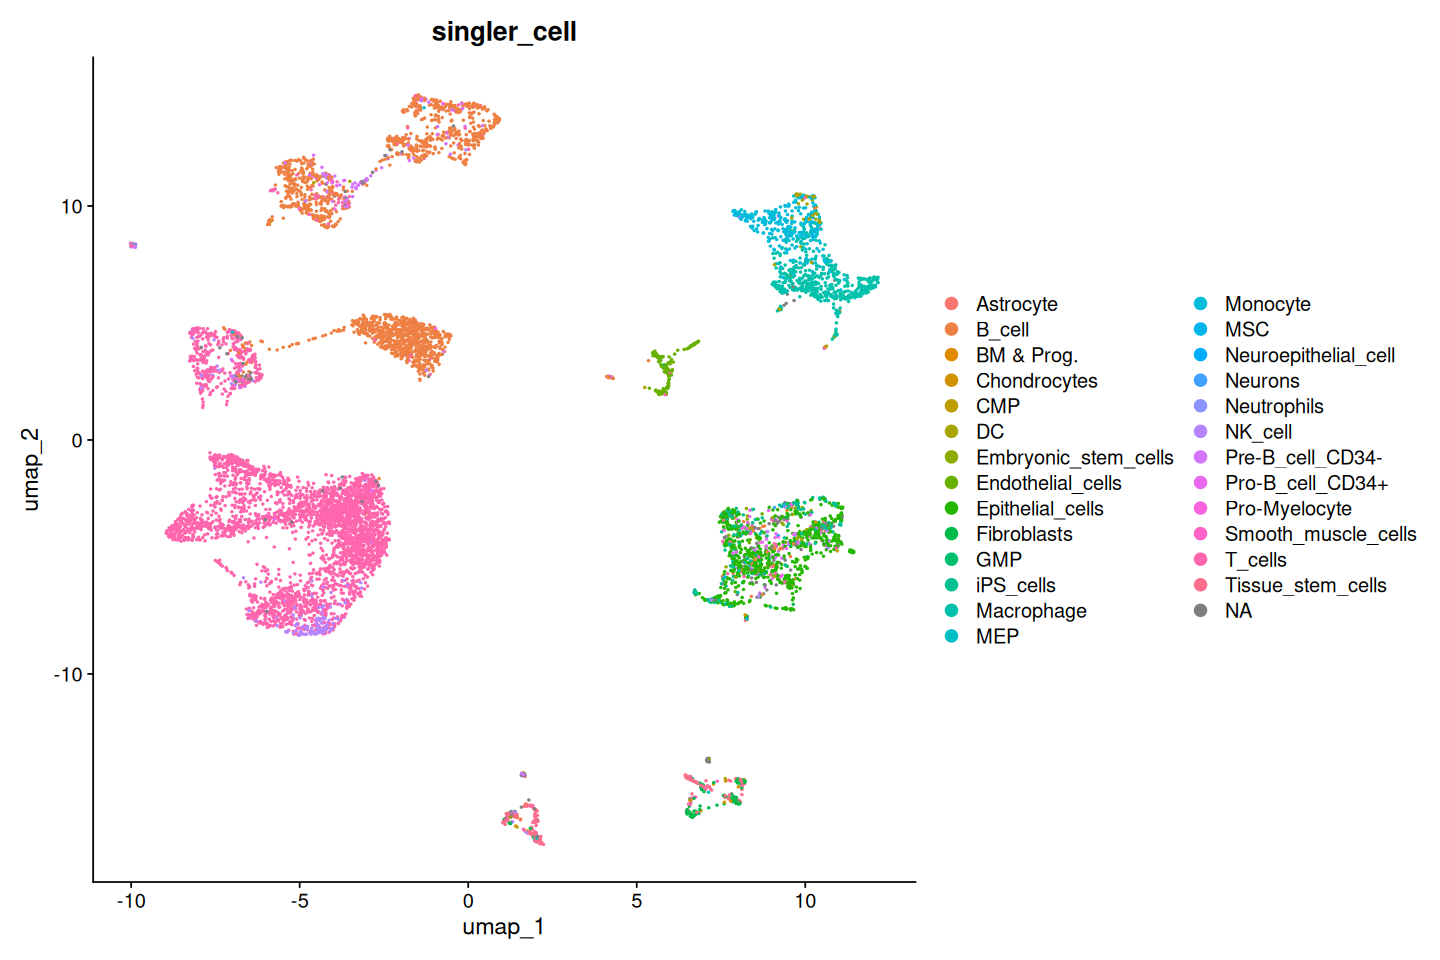

In [28]:
options(repr.plot.width=12, repr.plot.height=8)             # figure size
DimPlot(seu_obj, group.by='singler_cell')

In [29]:
print("Run singleR on clusters of cells")

[1] "Run singleR on clusters of cells"


In [30]:
# A second option to run singleR is predicting cell types for the whole cluster. 
# This option required the predefined cluster labels. 

In [31]:
louvain_clusters <- seu_obj@meta.data$seurat_clusters

# In order to run singleR for cluster, we need to add the parameter clusters. 
# This parameter will denote the predefined clusters.

singler_result2 <- SingleR(
    test = sce_obj,
    ref = hpca,
    labels = hpca$label.main,
    clusters = louvain_clusters,
)

In [32]:
singler_result2 

DataFrame with 17 rows and 4 columns
                            scores            labels delta.next
                          <matrix>       <character>  <numeric>
0   0.319304:0.656328:0.581279:...           T_cells   0.847933
1   0.318170:0.636602:0.574808:...           T_cells   0.519547
2   0.294382:0.734309:0.599450:...            B_cell   1.088334
3   0.323920:0.697349:0.580777:...            B_cell   0.280990
4   0.324909:0.681196:0.574754:...            B_cell   0.157005
...                            ...               ...        ...
12  0.421394:0.481266:0.414822:... Tissue_stem_cells  0.0911771
13  0.342681:0.666841:0.594577:...           T_cells  0.5802162
14  0.418935:0.497867:0.435262:... Endothelial_cells  0.1216990
15  0.470947:0.476542:0.409820:...  Epithelial_cells  0.1347957
16  0.291052:0.626069:0.594135:...          Monocyte  0.0969090
        pruned.labels
          <character>
0             T_cells
1             T_cells
2              B_cell
3              B_cell

In [33]:
unique(singler_result2$labels)
unique(singler_result2$pruned.labels)

[1] "T_cells"           "B_cell"            "Macrophage"       
[4] "Monocyte"          "Epithelial_cells"  "Fibroblasts"      
[7] "Tissue_stem_cells" "Endothelial_cells"

[1] "T_cells"           "B_cell"            "Macrophage"       
[4] "Monocyte"          "Epithelial_cells"  "Fibroblasts"      
[7] "Tissue_stem_cells" "Endothelial_cells"

In [34]:
# The singleR result will include prediction scores of all available cell types for each clusters. 
# The final prediction will be in the pruned.labels column.

head(data.frame(singler_result2))

,scores.Astrocyte,scores.B_cell,scores.BM,scores.BM...Prog.,scores.Chondrocytes,scores.CMP,scores.DC,scores.Embryonic_stem_cells,scores.Endothelial_cells,scores.Epithelial_cells,⋯,scores.Platelets,scores.Pre.B_cell_CD34.,scores.Pro.B_cell_CD34.,scores.Pro.Myelocyte,scores.Smooth_muscle_cells,scores.T_cells,scores.Tissue_stem_cells,labels,delta.next,pruned.labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0,0.3193042,0.6563279,0.5812787,0.4877431,0.3762672,0.5675688,0.5924409,0.3400603,0.4419660,0.4311406,⋯,0.5826143,0.6993680,0.6054467,0.5323177,0.3760071,0.7497228,0.3886661,T_cells,0.84793274,T_cells
1,0.3181700,0.6366017,0.5748076,0.4969390,0.3708575,0.5696763,0.5893724,0.3375183,0.4428952,0.4305355,⋯,0.5715521,0.6933642,0.5984866,0.5385744,0.3680787,0.7387926,0.3878608,T_cells,0.51954714,T_cells
2,0.2943817,0.7343088,0.5994502,0.4695005,0.3533554,0.5621405,0.6071165,0.3238455,0.4198660,0.4090571,⋯,0.5721759,0.6795460,0.6259066,0.5369448,0.3485374,0.6727196,0.3648018,B_cell,1.08833388,B_cell
3,0.3239200,0.6973494,0.5807769,0.5003453,0.3969198,0.5642378,0.6058101,0.3666751,0.4540060,0.4471642,⋯,0.5398579,0.6585752,0.6160585,0.5490755,0.3876130,0.6532196,0.4049787,B_cell,0.28099031,B_cell
4,0.3249089,0.6811957,0.5747540,0.4922987,0.4022967,0.5577988,0.6115537,0.3631101,0.4568727,0.4495709,⋯,0.5365695,0.6598641,0.6102546,0.5416823,0.3982096,0.6535928,0.4123765,B_cell,0.15700475,B_cell
5,0.3184161,0.5970078,0.6057949,0.4773068,0.4153659,0.5747506,0.7701660,0.3394663,0.4799048,0.4731640,⋯,0.5448558,0.7067345,0.5899435,0.5909132,0.4073844,0.6022240,0.4286224,Macrophage,0.09050552,Macrophage


In [35]:
singler_result2$pruned.labels

[1] "T_cells"           "T_cells"           "B_cell"           
 [4] "B_cell"            "B_cell"            "Macrophage"       
 [7] "T_cells"           "T_cells"           "Monocyte"         
[10] "T_cells"           "Epithelial_cells"  "Fibroblasts"      
[13] "Tissue_stem_cells" "T_cells"           "Endothelial_cells"
[16] "Epithelial_cells"  "Monocyte"

In [36]:
# Some clusters are annotated as the same cell type, we will make these annotations unique to keep the predefined clusters.

singler_result_unique <- list()
for (i in seq(1:length(singler_result2$pruned.labels))) {
    singler_result_unique <- append(
        singler_result_unique, 
        paste(as.character(i-1), singler_result2$pruned.labels[i])
    )
}
singler_result_unique <- unlist(singler_result_unique)

singler_result_unique

[1] "0 T_cells"            "1 T_cells"            "2 B_cell"            
 [4] "3 B_cell"             "4 B_cell"             "5 Macrophage"        
 [7] "6 T_cells"            "7 T_cells"            "8 Monocyte"          
[10] "9 T_cells"            "10 Epithelial_cells"  "11 Fibroblasts"      
[13] "12 Tissue_stem_cells" "13 T_cells"           "14 Endothelial_cells"
[16] "15 Epithelial_cells"  "16 Monocyte"

In [37]:
# add to meta data
seu_obj@meta.data$singler_cluster_unique <- seu_obj@meta.data$seurat_cluster
levels(seu_obj@meta.data$singler_cluster_unique) <- singler_result_unique

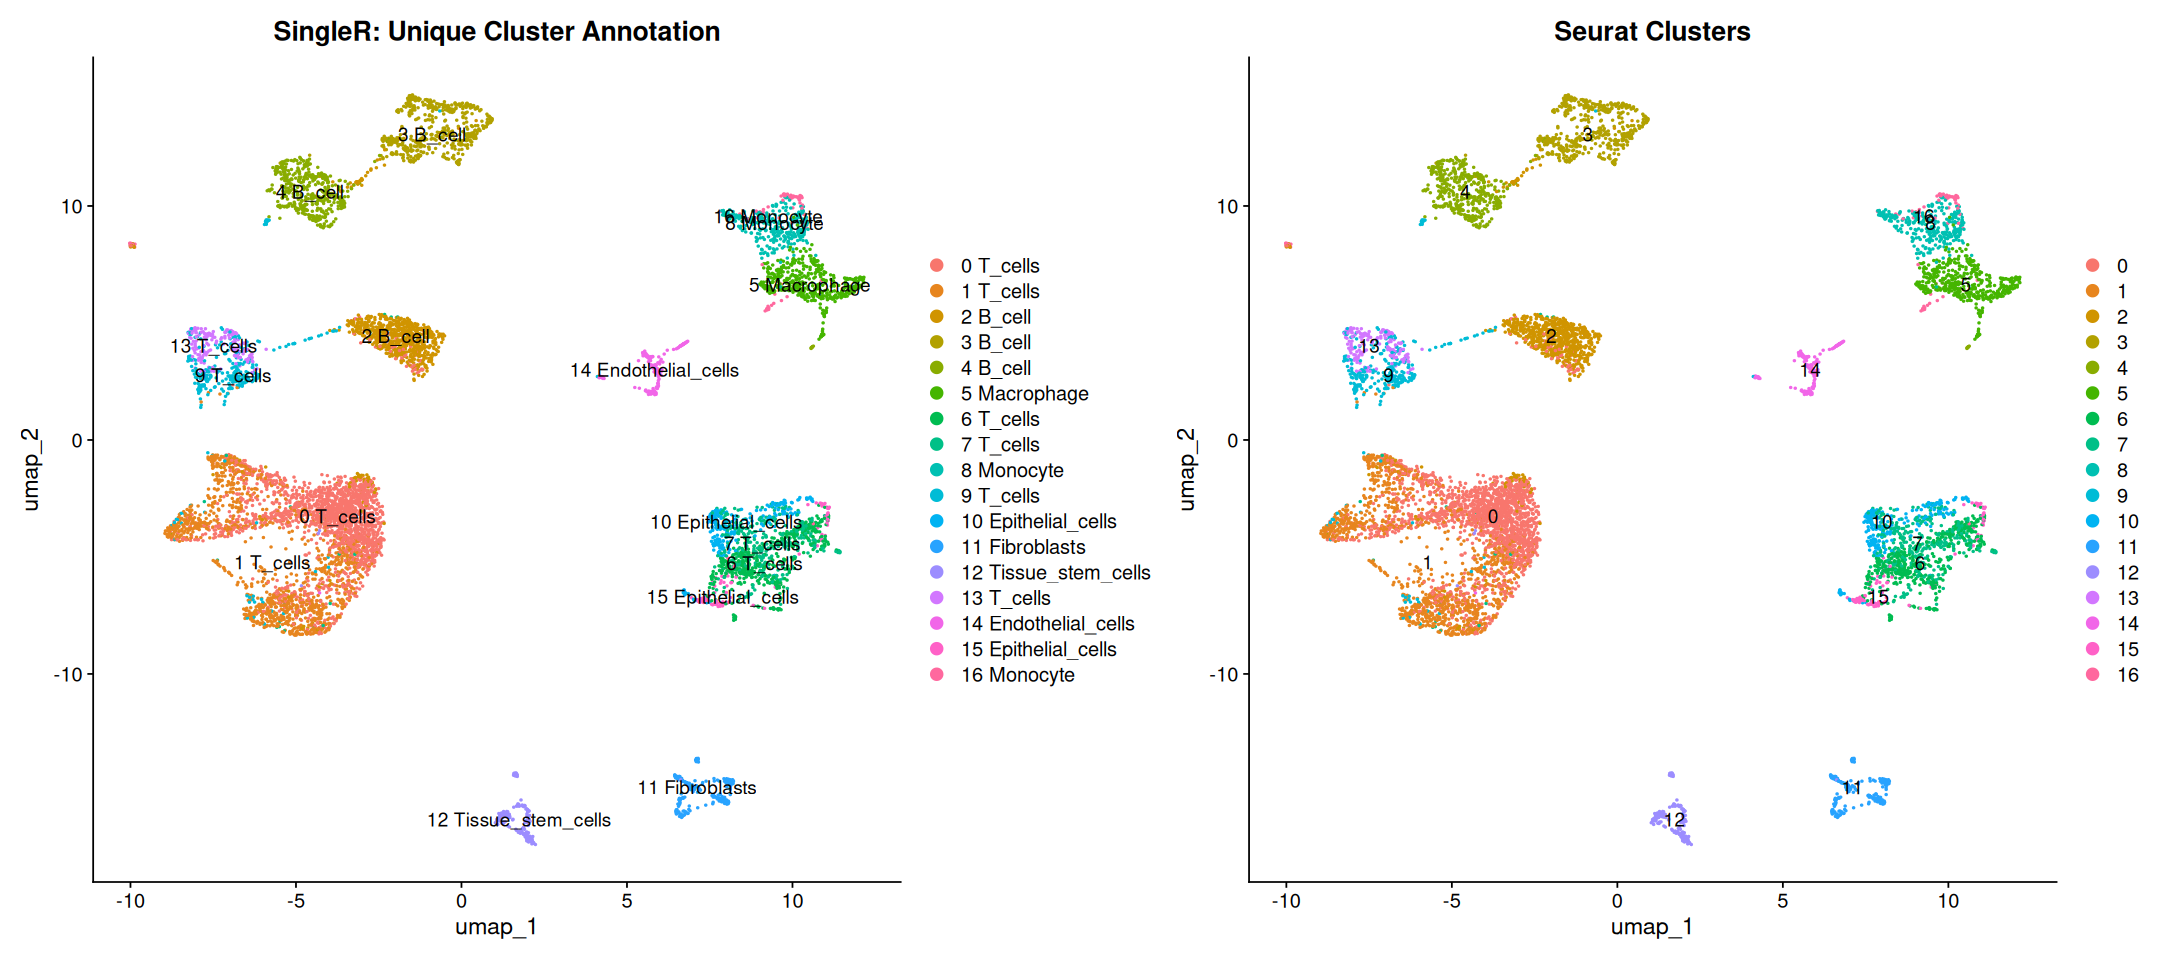

In [38]:
# Set figure size for side-by-side layout
options(repr.plot.width = 18, repr.plot.height = 8)

# DimPlot colored by unique SingleR cluster annotation
p1 <- DimPlot(seu_obj, group.by = "singler_cluster_unique", label = TRUE) +
  ggtitle("SingleR: Unique Cluster Annotation")

# DimPlot colored by original Seurat clustering
p2 <- DimPlot(seu_obj, group.by = "seurat_clusters", label = TRUE) +
  ggtitle("Seurat Clusters")

# Combine and display side by side
p1 + p2


In [39]:
# Some clusters are pretty similar such as 0 T_cells, 1 T_cells, these clusters can be merged together.

# However, 6 T cells and 7 T_cells clusters are extremely different from other T cells clusters, 
# and they seem to be clustered with endothelial cells. 
# Note that, breast cancer tumor cell are also originated from epithelial cells. 
# So these clusters of T cells are likely misclassified (because there are no tumor cell type in the dataset). 
# We will confirm our hypothesis with inferCNV in the following.
# Now, we will merge the similar clusters.

singler_cluster <- c(
    'T_cells_1',
    'T_cells_1',
    'B_cells_1',
    'B_cells_2',
    'B_cells_3',
    'Macrophage',
    'T_cells_2',
    'T_cells_2',
    'Monocytes',
    'T_cells_3',
    'Epithelial_cells',
    'Fibroblasts',
    'Tissue_stem_cells',
    'T_cells_3',
    'Endothelial_cells',
    'Epithelial_cells',
    'Monocytes'
)

In [40]:
seu_obj@meta.data$singler_cluster <- seu_obj@meta.data$seurat_cluster
levels(seu_obj@meta.data$singler_cluster) <- singler_cluster

unique(seu_obj@meta.data$seurat_cluster)
unique(seu_obj@meta.data$singler_cluster)

[1] 14 16 11 12 9  2  0  3  7  5  4  1  13 8  6  10 15
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16

[1] Endothelial_cells Monocytes         Fibroblasts       Tissue_stem_cells
 [5] T_cells_3         B_cells_1         T_cells_1         B_cells_2        
 [9] T_cells_2         Macrophage        B_cells_3         Epithelial_cells 
12 Levels: T_cells_1 B_cells_1 B_cells_2 B_cells_3 Macrophage ... Endothelial_cells

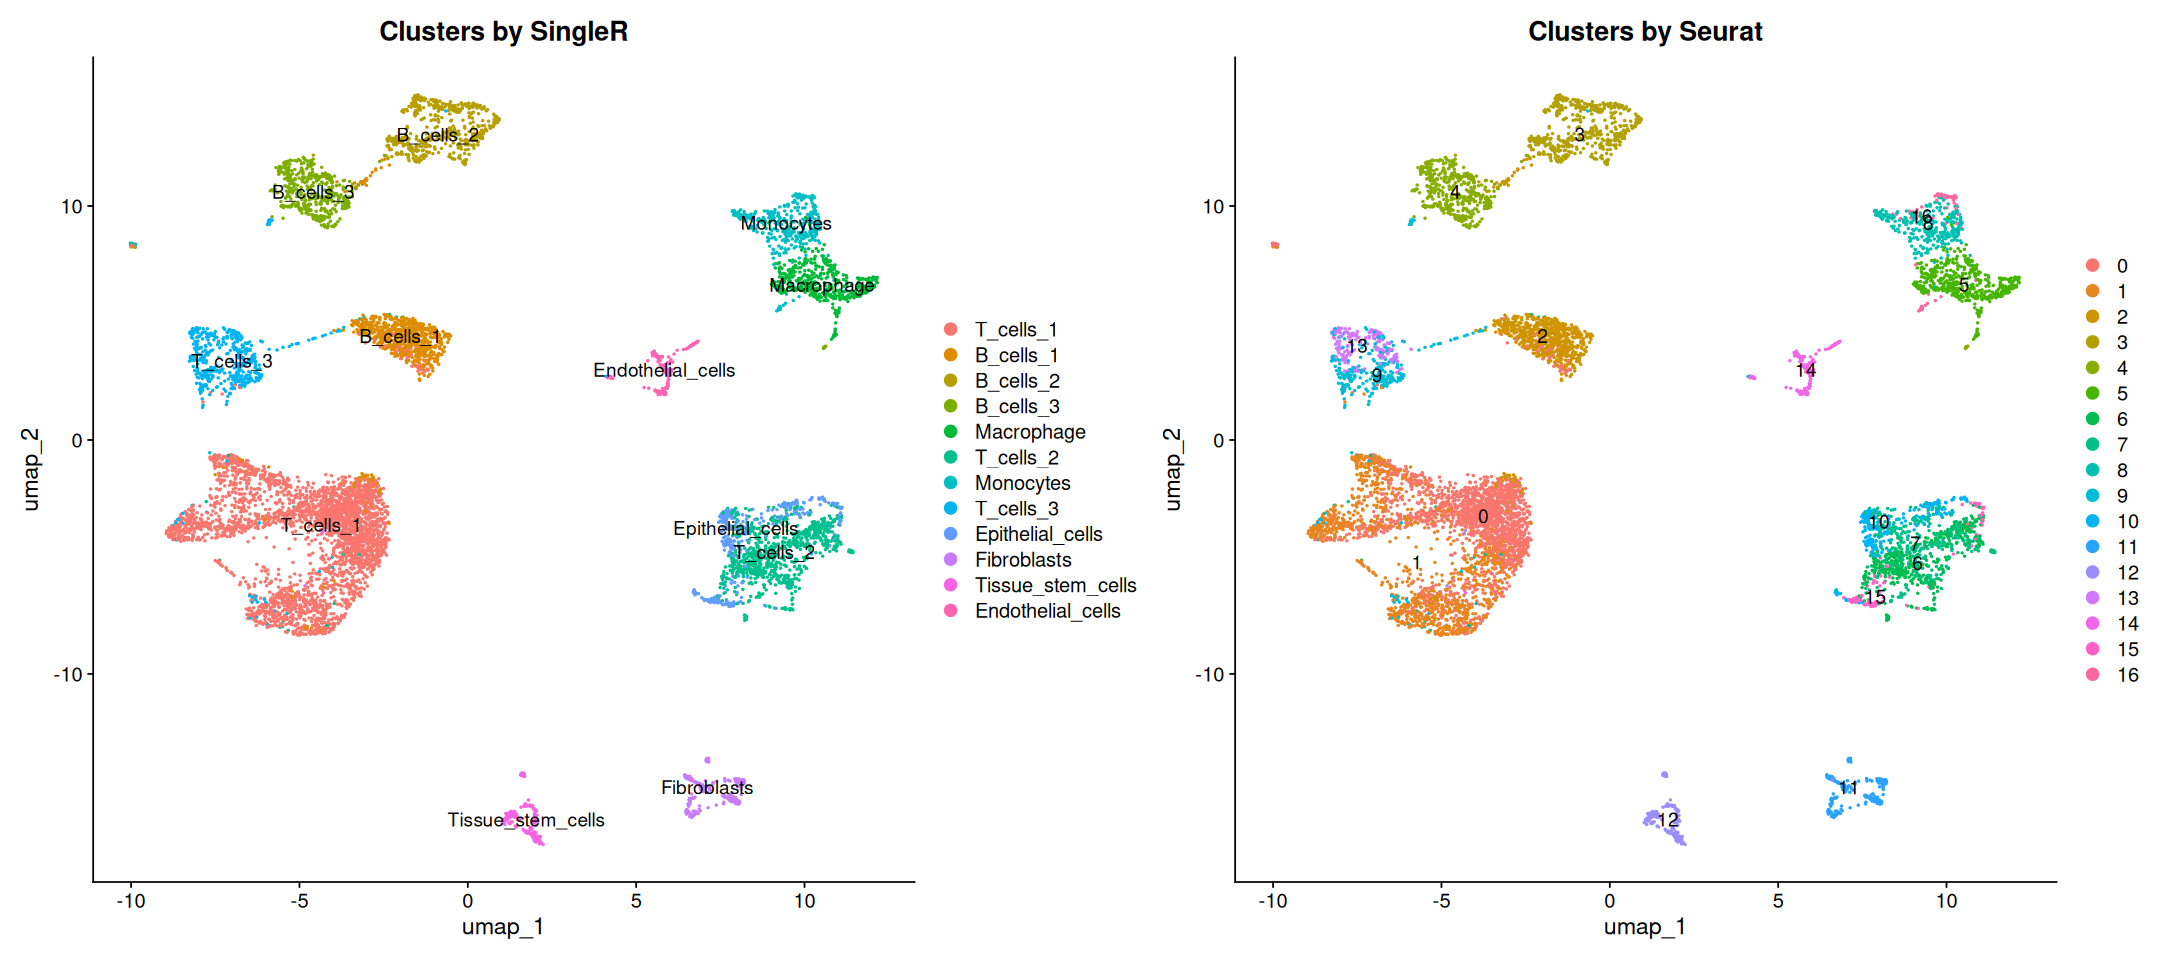

In [41]:
library("ggplot2")
options(repr.plot.width = 18, repr.plot.height = 8) 

p1 <- DimPlot(seu_obj, group.by = "singler_cluster", label = TRUE) +
  ggtitle("Clusters by SingleR")

p2 <- DimPlot(seu_obj, group.by = "seurat_clusters", label = TRUE) +
  ggtitle("Clusters by Seurat")

p1 + p2  # patchwork handles side-by-side layout


In [42]:
getwd()
# list.files()

[1] "/home/tanasa"

In [43]:
singler_labels <- dplyr::select(seu_obj@meta.data, singler_cluster)
write.table(singler_labels,'./infercnv_data/singler_labels.txt' ,sep='\t', quote=FALSE, col.names=FALSE)

In [44]:
head(read.table('./infercnv_data/singler_labels.txt'), 3)

,V1,V2
,<chr>,<chr>
1,CID4495_AACCGCGGTTTCCACC,Endothelial_cells
2,CID4495_ATCACGAAGGTGATAT,Endothelial_cells
3,CID4495_CATTATCTCAAACCAC,Endothelial_cells


In [45]:
head(read.table('infercnv_data/gencode_v19_gene_pos.txt'), 3)

,V1,V2,V3,V4
,<chr>,<chr>,<int>,<int>
1,DDX11L1,chr1,11869,14412
2,WASH7P,chr1,14363,29806
3,MIR1302-11,chr1,29554,31109


In [46]:
reference_cells <- c(
    'T_cells_1',
    'T_cells_3',
    'B_cells_1',
    'B_cells_2',
    'B_cells_3',
    'Macrophage',
    'Monocytes',
    'Fibroblasts',
    'Tissue_stem_cells',
    'Endothelial_cells'
)

In [47]:
# prepare the input for inferCNV

In [48]:
# Get counts matrix directly
counts_matrix <- GetAssayData(seu_obj, assay = "RNA", slot = "counts")

infercnv_obj <- CreateInfercnvObject(
  raw_counts_matrix = counts_matrix,
  annotations_file = "/home/tanasa/infercnv_data/singler_labels.txt",
  delim = "\t",
  gene_order_file = "/home/tanasa/infercnv_data/gencode_v19_gene_pos.txt",
  ref_group_names = reference_cells
)

INFO [2025-06-25 08:49:17] Parsing gene order file: /home/tanasa/infercnv_data/gencode_v19_gene_pos.txt
INFO [2025-06-25 08:49:17] Parsing cell annotations file: /home/tanasa/infercnv_data/singler_labels.txt
INFO [2025-06-25 08:49:17] ::order_reduce:Start.
INFO [2025-06-25 08:49:17] .order_reduce(): expr and order match.
INFO [2025-06-25 08:49:17] ::process_data:order_reduce:Reduction from positional data, new dimensions (r,c) = 29733,7985 Total=53842147 Min=0 Max=24510.
INFO [2025-06-25 08:49:17] num genes removed taking into account provided gene ordering list: 3233 = 10.873440285205% removed.
INFO [2025-06-25 08:49:17] -filtering out cells < 100 or > Inf, removing 0 % of cells
WARN [2025-06-25 08:49:17] Please use "options(scipen = 100)" before running infercnv if you are using the analysis_mode="subclusters" option or you may encounter an error while the hclust is being generated.
INFO [2025-06-25 08:49:17] validating infercnv_obj


In [49]:
str(infercnv_obj) 

Formal class 'infercnv' [package "infercnv"] with 8 slots
  ..@ expr.data                       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:11971377] 22 24 31 34 35 38 43 47 48 51 ...
  .. .. ..@ p       : int [1:7986] 0 4836 5516 6267 10710 13635 15562 17093 20645 23421 ...
  .. .. ..@ Dim     : int [1:2] 26500 7985
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:26500] "RP11-34P13.7" "RP11-34P13.8" "RP11-34P13.9" "AP006222.2" ...
  .. .. .. ..$ : chr [1:7985] "CID4495_AACCGCGGTTTCCACC" "CID4495_ATCACGAAGGTGATAT" "CID4495_CATTATCTCAAACCAC" "CID4495_CCTACACTCTTGGGTA" ...
  .. .. ..@ x       : num [1:11971377] 1 4 1 5 1 2 1 2 1 2 ...
  .. .. ..@ factors : list()
  ..@ count.data                      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:11971377] 22 24 31 34 35 38 43 47 48 51 ...
  .. .. ..@ p       : int [1:7986] 0 4836 5516 6267 10710 13635 15562 17093 20645 23421 ...
  .. .. ..@ Dim    

In [50]:
options(scipen=100)
infercnv_obj = infercnv::run(
    infercnv_obj = infercnv_obj,
    cutoff = 0.1,                            # we are using 10x data
    out_dir = "infercnv_data",  
    cluster_by_groups = TRUE, 
    denoise = TRUE,
    HMM = TRUE
)

INFO [2025-06-25 08:49:18] ::process_data:Start
INFO [2025-06-25 08:49:18] Checking for saved results.
INFO [2025-06-25 08:49:18] Trying to reload from step 22
INFO [2025-06-25 08:49:20] Using backup from step 22
INFO [2025-06-25 08:49:20] Trying to reload from step 20
INFO [2025-06-25 08:49:22] Using backup HMM from step 20
INFO [2025-06-25 08:49:22] Trying to reload from step 19
INFO [2025-06-25 08:49:22] Trying to reload from step 18
INFO [2025-06-25 08:49:22] Trying to reload from step 17
INFO [2025-06-25 08:49:22] Trying to reload from step 15
INFO [2025-06-25 08:49:25] 

	STEP 1: incoming data

INFO [2025-06-25 08:49:25] 

	STEP 02: Removing lowly expressed genes

INFO [2025-06-25 08:49:25] 

	STEP 03: normalization by sequencing depth

INFO [2025-06-25 08:49:25] 

	STEP 04: log transformation of data

INFO [2025-06-25 08:49:25] 

	STEP 08: removing average of reference data (before smoothing)

INFO [2025-06-25 08:49:25] 

	STEP 09: apply max centered expression threshold: 3

INF

In [51]:
str(infercnv_obj)

Formal class 'infercnv' [package "infercnv"] with 8 slots
  ..@ expr.data                       : num [1:5667, 1:7985] 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:5667] "NOC2L" "ISG15" "TNFRSF18" "TNFRSF4" ...
  .. .. ..$ : chr [1:7985] "CID4495_AACCGCGGTTTCCACC" "CID4495_ATCACGAAGGTGATAT" "CID4495_CATTATCTCAAACCAC" "CID4495_CCTACACTCTTGGGTA" ...
  ..@ count.data                      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:9936569] 1 4 5 7 9 10 14 18 20 23 ...
  .. .. ..@ p       : int [1:7986] 0 3328 3933 4612 7753 9995 11487 12608 15121 17121 ...
  .. .. ..@ Dim     : int [1:2] 5667 7985
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:5667] "NOC2L" "ISG15" "TNFRSF18" "TNFRSF4" ...
  .. .. .. ..$ : chr [1:7985] "CID4495_AACCGCGGTTTCCACC" "CID4495_ATCACGAAGGTGATAT" "CID4495_CATTATCTCAAACCAC" "CID4495_CCTACACTCTTGGGTA" ...
  .. .. ..@ x       : num [1:9936569] 4 5 2 1 2 1 2 2 3 1 ...
  .. .. ..@ factors 

In [52]:
getwd()

[1] "/home/tanasa"